In [2]:
from functions.utils import *
import warnings

warnings.filterwarnings('ignore')

In [3]:
Criteria = load_data(path='../donnees/criteria.csv')

In [4]:
Criteria

,criterionId,lotId,name,weight,type
0,0,0,PRIX DES PRESTATIONS,40.0,PRICE
1,1,0,VALEUR TECHNIQUE,40.0,TECHNICAL
2,2,0,DELAI D'EXECUTION,20.0,DELAY
3,3,1,PRIX DES PRESTATIONS,40.0,PRICE
4,4,1,VALEUR TECHNIQUE,40.0,TECHNICAL
...,...,...,...,...,...
2910403,2910403,1380955,MOYENS HUMAINS; ORGANISATION GENERALE; GESTION...,50.0,SOCIAL
2910404,2910404,1380956,PRIX,50.0,PRICE
2910405,2910405,1380956,MOYENS HUMAINS; ORGANISATION GENERALE; GESTION...,50.0,SOCIAL
2910406,2910406,1380958,ORGANISATION ET RESSOURCES,50.0,OTHER


# Attribut lotId

In [5]:
lotId = Criteria[['lotId']]

In [6]:
lotId

,lotId
0,0
1,0
2,0
3,1
4,1
...,...
2910403,1380955
2910404,1380956
2910405,1380956
2910406,1380958


In [7]:
lotId_vc = get_vc(Criteria, column='lotId')

In [8]:
lotId_vc

,valeur,count,proportion
0,448597,87,0.002989
1,448586,87,0.002989
2,448588,87,0.002989
3,448589,87,0.002989
4,448590,87,0.002989
...,...,...,...
1041237,1194472,1,0.000034
1041238,1194471,1,0.000034
1041239,622421,1,0.000034
1041240,789536,1,0.000034


In [7]:
lotId_c = lotId.value_counts()

In [8]:
lotId_c

lotId  
448597     87
448586     87
448588     87
448589     87
448590     87
           ..
1194472     1
1194471     1
622421      1
789536      1
1070464     1
Name: count, Length: 1041242, dtype: int64

In [11]:
lotId_c[lotId_c>1]

lotId 
448597    87
448586    87
448588    87
448589    87
448590    87
          ..
606249     2
619350     2
641558     2
606620     2
606619     2
Name: count, Length: 961186, dtype: int64

Cela nous indique combien de fois chaque lot a été évalué.C'est donc normal d'avaoir des valeurs dupliqué de cette attribut.

# Attribut criterionId

In [12]:
criterionId = Criteria[['criterionId']]

In [13]:
criterionId

,criterionId
0,0
1,1
2,2
3,3
4,4
...,...
2910403,2910403
2910404,2910404
2910405,2910405
2910406,2910406


In [14]:
criterionId_vc = get_vc(Criteria, column='criterionId')

In [15]:
criterionId_vc

,valeur,count,proportion
0,0,1,0.000034
1,1940242,1,0.000034
2,1940266,1,0.000034
3,1940267,1,0.000034
4,1940268,1,0.000034
...,...,...,...
2910403,970138,1,0.000034
2910404,970139,1,0.000034
2910405,970140,1,0.000034
2910406,970141,1,0.000034


D'apres ces calculs, la décision d'utiliser un entier de 64 bits plutôt que de 32 bits mérite d'être discutée :

La valeur maximale pour un entier de 32 bits est : 2147483647

tandis que pour un entier de 64 bits, elle atteint: 9223372036854775807.

Étant donné qu'il y a 2910408 lots, même un entier de 32 bits serait suffisant

Les mesures statistiques comme la moyenne, la médiane ou l'écart-type n'ont pas de sens pour une séquence de nombres uniques.Nous n'allons pas calculer les statistiques

# Attribut name

In [16]:
name = Criteria[['name']]

In [17]:
name

,name
0,PRIX DES PRESTATIONS
1,VALEUR TECHNIQUE
2,DELAI D'EXECUTION
3,PRIX DES PRESTATIONS
4,VALEUR TECHNIQUE
...,...
2910403,MOYENS HUMAINS; ORGANISATION GENERALE; GESTION...
2910404,PRIX
2910405,MOYENS HUMAINS; ORGANISATION GENERALE; GESTION...
2910406,ORGANISATION ET RESSOURCES


In [18]:
name_vc = get_vc(Criteria, column='name')

In [19]:
name_vc

,valeur,count,proportion
0,PRIX,531514,18.262563
1,VALEUR TECHNIQUE,350308,12.036413
2,PRIX DES PRESTATIONS,127532,4.381938
3,VALEUR TECHNIQUE DE L'OFFRE,36646,1.259139
4,DELAI DE LIVRAISON,29520,1.014293
...,...,...,...
236772,VALEUR TECHNIQUE; JUGEE SUR LA BASE DU MEMOIRE...,1,0.000034
236773,QUALITE DU SAV; GARANTIE ET FORMATION,1,0.000034
236774,DELAI DE LIVRAISON ET DELAI DE REMISE DU DEVIS,1,0.000034
236775,SAV/ASSISTANCE TECHNIQUE,1,0.000034


In [20]:
plot_proportion(
    data=name_vc,
    xcol='valeur', 
    ycol='proportion', 
    title='Proportion des noms des critére', 
    xtitle='name', 
    ytitle='proportion',
    saveas='../images/01_desc_name1_01.png',
    logy=True
)

: 

# Attribut weight

In [ ]:
weight = Criteria[['weight']]

In [ ]:
weight

,weight
0,40.0
1,40.0
2,20.0
3,40.0
4,40.0
...,...
2910403,50.0
2910404,50.0
2910405,50.0
2910406,50.0


In [ ]:
weight_vc = get_vc(Criteria, column='name')

In [ ]:
weight_vc

,valeur,count,proportion
0,PRIX,531514,18.262563
1,VALEUR TECHNIQUE,350308,12.036413
2,PRIX DES PRESTATIONS,127532,4.381938
3,VALEUR TECHNIQUE DE L'OFFRE,36646,1.259139
4,DELAI DE LIVRAISON,29520,1.014293
...,...,...,...
236772,VALEUR TECHNIQUE; JUGEE SUR LA BASE DU MEMOIRE...,1,0.000034
236773,QUALITE DU SAV; GARANTIE ET FORMATION,1,0.000034
236774,DELAI DE LIVRAISON ET DELAI DE REMISE DU DEVIS,1,0.000034
236775,SAV/ASSISTANCE TECHNIQUE,1,0.000034


In [ ]:
weight.describe()

,weight
count,2.910408e+06
mean,3.577650e+01
std,2.298320e+01
min,0.000000e+00
25%,1.500000e+01
50%,3.750000e+01
75%,5.000000e+01
max,1.000000e+02


In [ ]:
weight.max()

weight    100.0
dtype: float64

In [ ]:
weight.min()

weight    0.0
dtype: float64

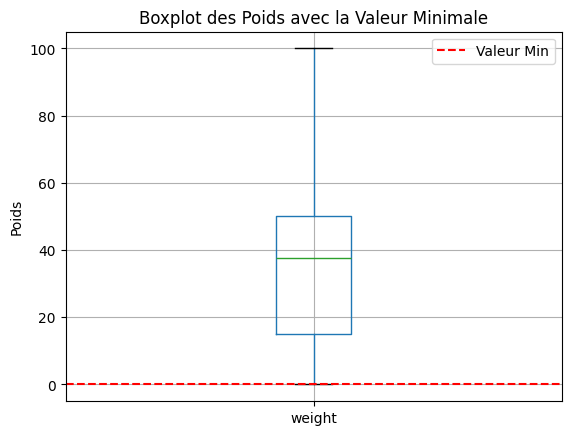

In [ ]:
Criteria.boxplot(column=['weight'])

plt.axhline(y=0, color='r', linestyle='dashed', label='Valeur Min')

plt.legend()
plt.title('Boxplot des Poids avec la Valeur Minimale')
plt.ylabel('Poids')
plt.show()


Nous pouvons voir que seulement quelques lots n'ont pas de poids.

In [ ]:
plot_proportion(
    data=weight_vc,
    xcol='valeur', 
    ycol='proportion', 
    title='Proportion des poids des critére', 
    xtitle='poids', 
    ytitle='proportion',
    saveas='../images/03_desc_weight_01.png',
    logy=True
)

NameError: name 'plot_proportion' is not defined

# Attribut type

In [ ]:
type = Criteria[['type']]

In [ ]:
type

,awardDate
0,2009-09-24
1,2009-09-24
2,2009-09-24
3,2009-09-28
4,2009-11-06
...,...
1380960,2020-12-28
1380961,2020-12-10
1380962,2020-12-17
1380963,2020-12-11


In [ ]:
type_vc = get_vc(Criteria, column='type')

In [ ]:
type_vc

,valeur,count,proportion
0,2012-01-01,188537,13.652555
1,2011-01-01,1675,0.121292
2,2010-01-01,1634,0.118323
3,2010-01-04,1386,0.100365
4,2019-12-18,1310,0.094861
...,...,...,...
4367,2010-07-04,1,0.000072
4368,2006-12-21,1,0.000072
4369,2012-10-07,1,0.000072
4370,2001-01-04,1,0.000072


In [ ]:
type.describe()

,awardDate,year,month
0,2009-09-24,2009,9
1,2009-09-24,2009,9
2,2009-09-24,2009,9
3,2009-09-28,2009,9
4,2009-11-06,2009,11
...,...,...,...
1380960,2020-12-28,2020,12
1380961,2020-12-10,2020,12
1380962,2020-12-17,2020,12
1380963,2020-12-11,2020,12


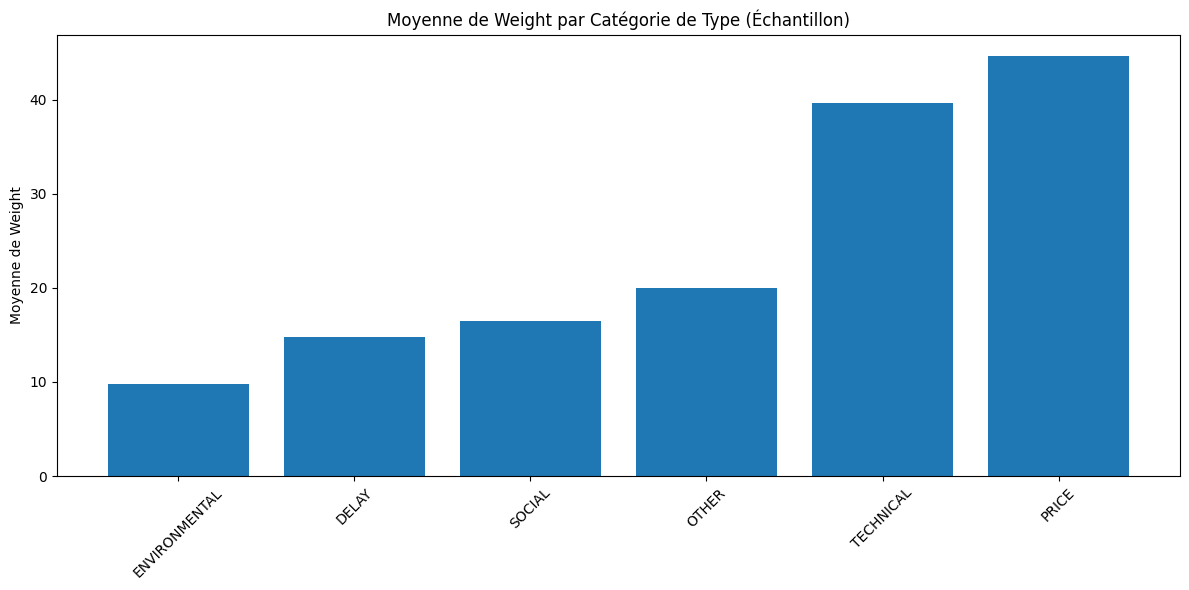

In [9]:
import matplotlib.pyplot as plt

mean_weights_per_type = Criteria.groupby('type')['weight'].mean()

sorted_types = mean_weights_per_type.sort_values().index
sorted_means = mean_weights_per_type.sort_values()

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_types)), sorted_means, tick_label=sorted_types)

plt.xticks(rotation=45)
plt.ylabel('Moyenne de Weight')
plt.title('Moyenne de Weight par Catégorie de Type (Échantillon)')

plt.tight_layout()
plt.show()


In [18]:
Criteria['weight'] = pd.to_numeric(Criteria['weight'], errors='coerce')  # Convertir en type float
Criteria['type'] = Criteria['type'].astype('category').cat.codes  # Convertir en codes catégoriels

correlation_weight_type = Criteria['weight'].corr(Criteria['type'])

print("Corrélation entre Weight et Type :", correlation_weight_type)

Corrélation entre Weight et Type : 0.32170702583935523


In [19]:
Criteria['weight_interval'] = pd.cut(Criteria['weight'], bins=4, labels=["Pas important", "Peu important", "Important", "Très important"])

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

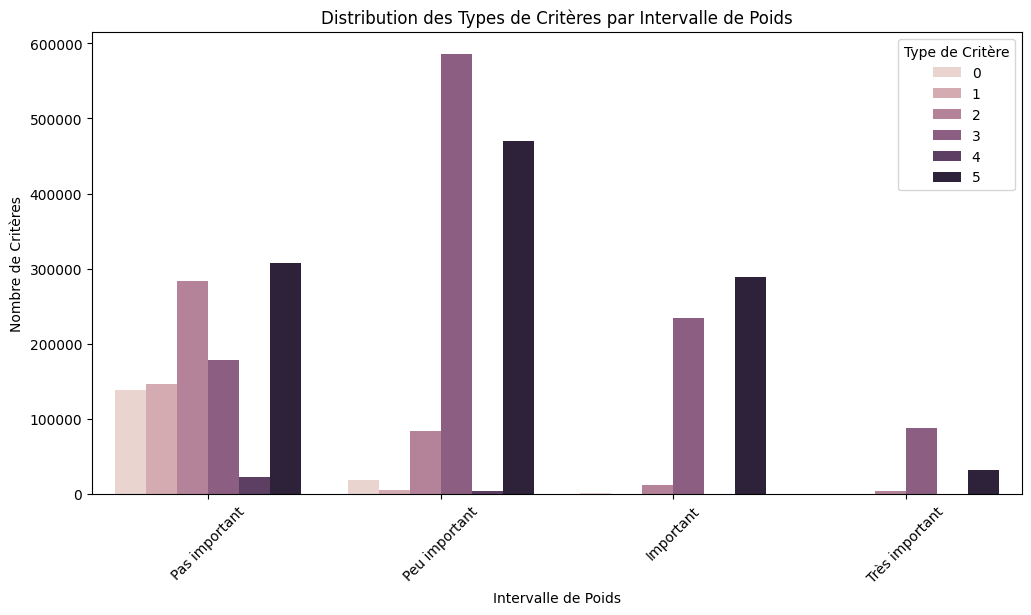

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Criteria, x='weight_interval', hue='type')
plt.title('Distribution des Types de Critères par Intervalle de Poids')
plt.xlabel('Intervalle de Poids')
plt.ylabel('Nombre de Critères')
plt.xticks(rotation=45)
plt.legend(title='Type de Critère')
plt.show()
